In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import os
import pandas as pd
import math
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.losses import categorical_crossentropy

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


# to show the folders under the dataset
!ls "/content/drive/My Drive/OTHM AI/Deep Learning/Image Classification CNN"

 ants   grasshopper				  moth		    wasp
 bees  'Image Classification - CNN Model.ipynb'   Untitled0.ipynb


In [4]:
# Set the paths to the folders containing the image files
grasshopper_path = '/content/drive/My Drive/OTHM AI/Deep Learning/Image Classification CNN/grasshopper'
bees_path = '/content/drive/My Drive/OTHM AI/Deep Learning/Image Classification CNN/bees'
moth_path = '/content/drive/My Drive/OTHM AI/Deep Learning/Image Classification CNN/moth'
wasp_path = '/content/drive/My Drive/OTHM AI/Deep Learning/Image Classification CNN/wasp'
ants_path = '/content/drive/My Drive/OTHM AI/Deep Learning/Image Classification CNN/ants'


# get a list of all files in the folder
grasshopper_file_list = os.listdir(grasshopper_path)
bees_file_list = os.listdir(bees_path)
moth_file_list = os.listdir(moth_path)
wasp_file_list = os.listdir(wasp_path)
ants_file_list = os.listdir(ants_path)

# print the total number of files
print(f'Total number of files under grasshopper folder are: {len(grasshopper_file_list)}')
print(f'Total number of files under bees folder are: {len(bees_file_list)}')
print(f'Total number of files under moth folder are: {len(moth_file_list)}')
print(f'Total number of files under wasp folder are: {len(wasp_file_list)}')
print(f'Total number of files under ants folder are: {len(ants_file_list)}')

Total number of files under grasshopper folder are: 485
Total number of files under bees folder are: 500
Total number of files under moth folder are: 497
Total number of files under wasp folder are: 498
Total number of files under ants folder are: 499


In [5]:
# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(grasshopper_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(grasshopper_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'grasshopper'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(bees_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(bees_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'bees'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the third folder
for file in os.listdir(moth_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(moth_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'moth'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the fourth folder
for file in os.listdir(wasp_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(wasp_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'wasp'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the fifth folder
for file in os.listdir(ants_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(ants_path, file))
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'ants'
    # Add the image data and label to the data list
    data.append((img, label))

In [6]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

In [7]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1732, 100, 100, 3)
Testing matrix shape (743, 100, 100, 3)


In [9]:
print('The original format of class of the first element in the training dataset is: ',Y_train[0], '\n')

# Create a NumPy array with category strings
categories = np.array(['grasshopper' , 'bees', 'moth' , 'wasp' , 'ants'])

# Create a mapping from category strings to integers
category_map = {'grasshopper': 0, 'bees': 1, 'moth': 2, 'wasp': 3, 'ants': 4}

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the calss of the first element in the training dataset is: ',Y_train[0])

The original format of class of the first element in the training dataset is:  grasshopper 

The unique integer mapping encoding format of the calss of the first element in the training dataset is:  0


In [10]:
img_rows, img_cols = 100, 100
channels = 3

In [11]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [12]:
def model_2():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))
    model.summary()
    return model

In [13]:
y_train = to_categorical(Y_train, 5)
y_test = to_categorical(Y_test, 5)

In [14]:
model = model_2()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 76832)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     9,834,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,836,165 (37.52 MB)

 Trainable params: 9,836,165 (37.52 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, y_test),
      validation_split=0.2)

Epoch 1/100
14/14 - 13s - 919ms/step - accuracy: 0.2263 - loss: 1.6398 - val_accuracy: 0.2369 - val_loss: 1.6028
Epoch 2/100
14/14 - 1s - 75ms/step - accuracy: 0.2852 - loss: 1.5633 - val_accuracy: 0.2786 - val_loss: 1.5651
Epoch 3/100
14/14 - 1s - 38ms/step - accuracy: 0.3233 - loss: 1.5215 - val_accuracy: 0.2786 - val_loss: 1.5396
Epoch 4/100
14/14 - 1s - 41ms/step - accuracy: 0.3585 - loss: 1.4825 - val_accuracy: 0.3042 - val_loss: 1.5191
Epoch 5/100
14/14 - 1s - 44ms/step - accuracy: 0.3943 - loss: 1.4271 - val_accuracy: 0.3055 - val_loss: 1.5104
Epoch 6/100
14/14 - 1s - 45ms/step - accuracy: 0.4284 - loss: 1.3933 - val_accuracy: 0.3594 - val_loss: 1.4553
Epoch 7/100
14/14 - 1s - 47ms/step - accuracy: 0.4694 - loss: 1.3334 - val_accuracy: 0.3419 - val_loss: 1.4526
Epoch 8/100
14/14 - 1s - 38ms/step - accuracy: 0.4965 - loss: 1.2952 - val_accuracy: 0.3970 - val_loss: 1.4071
Epoch 9/100
14/14 - 1s - 43ms/step - accuracy: 0.5040 - loss: 1.2646 - val_accuracy: 0.4199 - val_loss: 1.3909

In [16]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.0466
Train accuracy: 0.9994 

Test loss: 1.314
Test accuracy: 0.5612


In [20]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

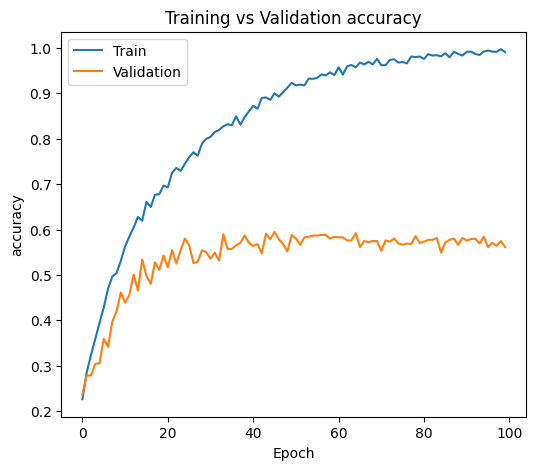

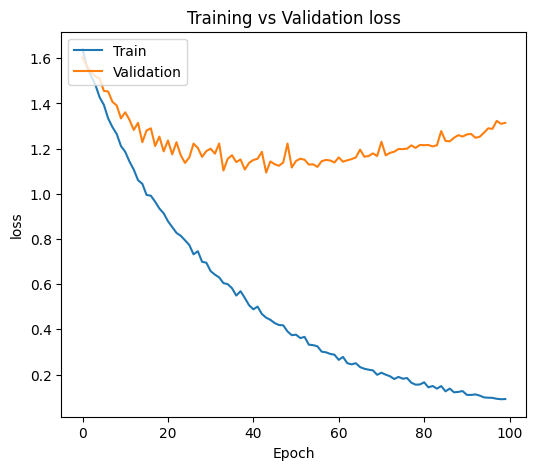

In [23]:
plot_hist(pd.DataFrame(hist.history))

In [22]:
labels =  ['grasshopper' , 'bees', 'moth' , 'wasp' , 'ants']
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= labels)

# Print the report
print("The result of the classification report is: \n ",report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
The result of Kappa is : 0.451
The result of the classification report is: 
                precision    recall  f1-score   support

 grasshopper       0.53      0.40      0.46       172
        bees       0.58      0.35      0.44       131
        moth       0.65      0.80      0.72       141
        wasp       0.56      0.74      0.64       152
        ants       0.48      0.52      0.50       147

    accuracy                           0.56       743
   macro avg       0.56      0.56      0.55       743
weighted avg       0.56      0.56      0.55       743



Handling Overfiiting - Data Augmentation

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)
datagen.fit(X_train)

# Use datagen.flow() instead of x_train directly during training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4378 - loss: 1.6671 - val_accuracy: 0.5384 - val_loss: 1.1573
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.4835 - loss: 1.2910 - val_accuracy: 0.5760 - val_loss: 1.1033
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5066 - loss: 1.2710 - val_accuracy: 0.5491 - val_loss: 1.1481
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.4921 - loss: 1.2979 - val_accuracy: 0.5707 - val_loss: 1.1208
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.4957 - loss: 1.2727 - val_accuracy: 0.5639 - val_loss: 1.1463
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5232 - loss: 1.2506 - val_accuracy: 0.5868 - val_loss: 1.1042
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4932 - loss: 1.2822 - val_accuracy: 0.5922 - val_loss: 1.0801
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.5300 - loss: 1.2296 - val_accuracy: 0.5949 

In [29]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.2833
Train accuracy: 0.9584 

Test loss: 0.9974
Test accuracy: 0.6393


In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=callbacks)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9335 - loss: 0.2751 - val_accuracy: 0.6380 - val_loss: 1.1588 - learning_rate: 1.0000e-04
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9552 - loss: 0.1736 - val_accuracy: 0.6460 - val_loss: 1.1904 - learning_rate: 1.0000e-04
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9674 - loss: 0.1461 - val_accuracy: 0.6272 - val_loss: 1.2601 - learning_rate: 1.0000e-04
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9773 - loss: 0.0991 - val_accuracy: 0.6433 - val_loss: 1.2197 - learning_rate: 1.0000e-04
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9861 - loss: 0.0787 - val_accuracy: 0.6487 - val_loss: 1.2367 - learning_rate: 5.0000e-05
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9856 - loss: 0.0817 - val_accuracy: 0.6339 - val_loss: 1.2637 - learning_rate: 5.0000e-05


In [32]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.0835
Train accuracy: 0.9896 

Test loss: 1.1588
Test accuracy: 0.638


The overfitting problem is still remian in the problem. This is mainly due to the smaller dataset that we are using for the problem.